# Temperature Forecast Project using ML
### Problem Statement:
**Data Set Information:**

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

### Please note that there are two target variables here:

* **1) Next_Tmax: Next day maximum temperature**
* **2) Next_Tmin: Next day  minimum temperature**



Note: Use the link below to download the dataset. 

Downlaod Files:
https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

### Importing Necessery liabraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Lets load the dataset with given URL
df = pd.read_csv(r"D:\data scienctist\projects\Evolution Projects\Evolution projects data\temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Here We have imported the dataset using pd.read_csv and set the option to display all the columns present in the dataset.
* The dataset contains the details of summer temperature data.
* This dataset is comprised of 7752 rows and 25 columns including two target varibales.
* In the dataset there are two target columns, one is Next_Tmax and Next_Tmin. 
* Since both the output attributes are continuous in nature so it termed to be a Regression Type problem.
We will look more into the dataset in the EDA part.

##  Exploratory Data Analysis(EDA) & Feature Engineering:

In [3]:
# to get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


* As we can see that 1 data type is object and all other float data type only.
* and some columns have null values.

In [4]:
# checking the null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

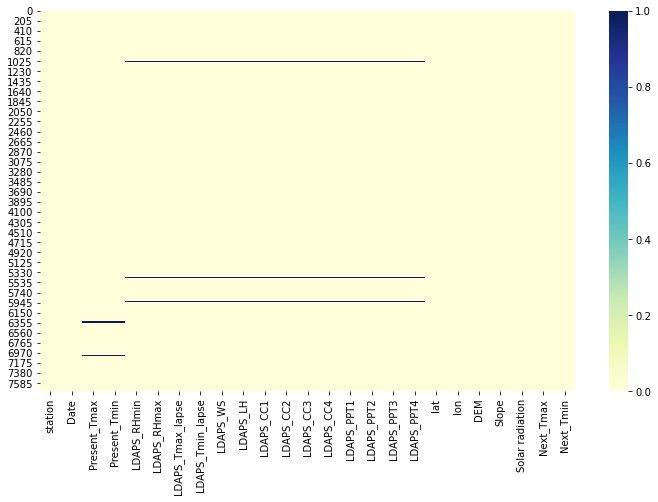

In [5]:
# Let's visualize the null values clearly
plt.figure(figsize= (12,7))
sns.heatmap(df.isnull(),cmap="YlGnBu")

* We can see, we have multiple null values in many of our columns. 

In [6]:
# checking the % null values.
for i in df:
    percentage = np.round((df[i].isnull().sum()/614)*100,2)
    print(i,':' , percentage,'%')

station : 0.33 %
Date : 0.33 %
Present_Tmax : 11.4 %
Present_Tmin : 11.4 %
LDAPS_RHmin : 12.21 %
LDAPS_RHmax : 12.21 %
LDAPS_Tmax_lapse : 12.21 %
LDAPS_Tmin_lapse : 12.21 %
LDAPS_WS : 12.21 %
LDAPS_LH : 12.21 %
LDAPS_CC1 : 12.21 %
LDAPS_CC2 : 12.21 %
LDAPS_CC3 : 12.21 %
LDAPS_CC4 : 12.21 %
LDAPS_PPT1 : 12.21 %
LDAPS_PPT2 : 12.21 %
LDAPS_PPT3 : 12.21 %
LDAPS_PPT4 : 12.21 %
lat : 0.0 %
lon : 0.0 %
DEM : 0.0 %
Slope : 0.0 %
Solar radiation : 0.0 %
Next_Tmax : 4.4 %
Next_Tmin : 4.4 %


In [7]:
# Checking duplicated values

df.duplicated().sum()

0

* Duplicate values are not present in our data set, Now lets remove the Null values from our data set to further process.

In [8]:
# dropping all null values
df=df.dropna()

In [9]:
# checking the null values after dropping
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

* all null values have been removed.

<AxesSubplot:>

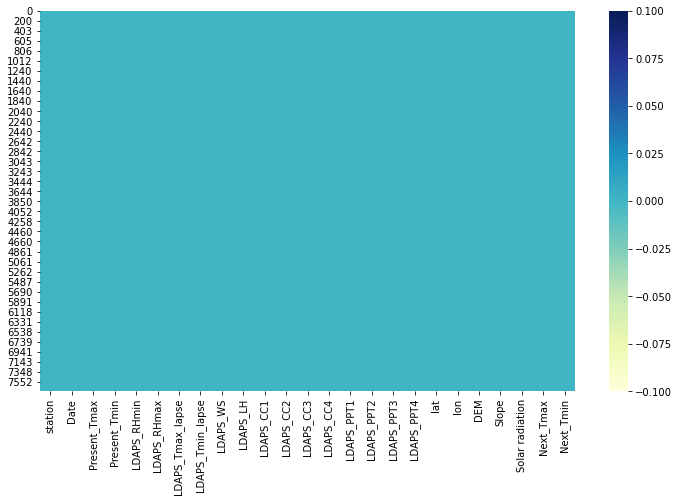

In [10]:
# Let's visualize the null values clearly
plt.figure(figsize= (12,7))
sns.heatmap(df.isnull(),cmap="YlGnBu")

* There is no null values present clearly shows by using heatmap.

In [11]:
# describing dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7588.0,13.014101,7.217858,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7588.0,29.748366,2.967401,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7588.0,23.195809,2.400880,11.300000,21.600000,23.400000,24.800000,29.900000
LDAPS_RHmin,7588.0,56.724969,14.626559,19.794666,45.960243,55.023199,67.115099,98.524734
LDAPS_RHmax,7588.0,88.360823,7.199456,58.936283,84.203724,89.784122,93.742725,100.000153
LDAPS_Tmax_lapse,7588.0,29.620128,2.943496,17.624954,27.673756,29.709537,31.711109,38.542255
LDAPS_Tmin_lapse,7588.0,23.511786,2.342579,14.272646,22.086820,23.758249,25.155660,29.619342
LDAPS_WS,7588.0,7.094097,2.177034,2.882580,5.675358,6.547838,8.028960,21.857621
LDAPS_LH,7588.0,62.492606,33.686158,-13.603212,37.206201,56.898324,84.235666,213.414006
LDAPS_CC1,7588.0,0.368510,0.262260,0.000000,0.146546,0.315706,0.574174,0.967277


<AxesSubplot:>

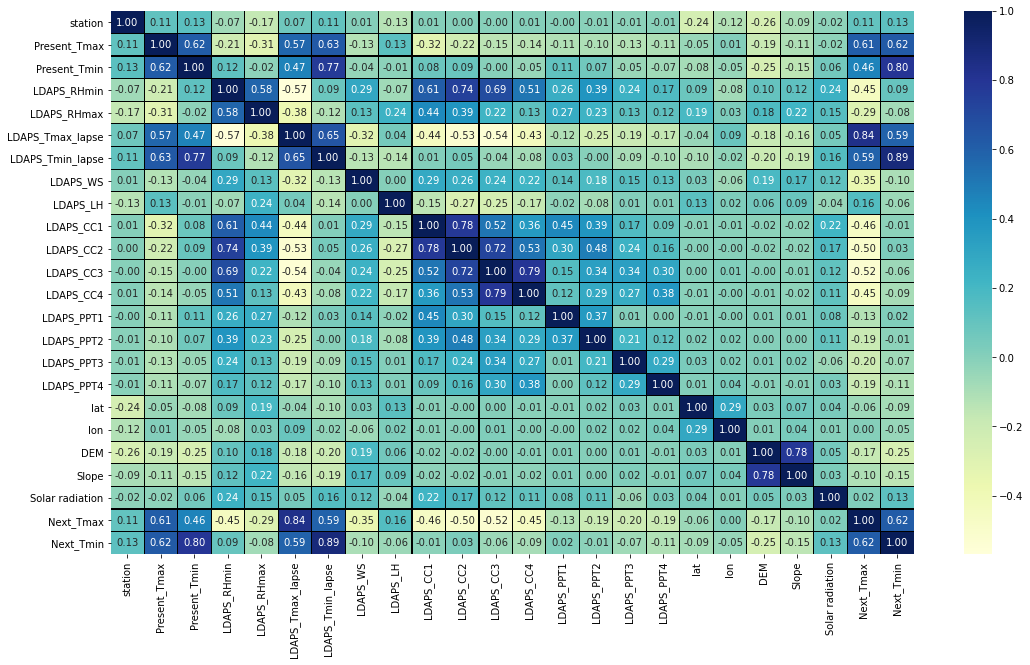

In [12]:
# Checking correlation

dfcor=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f',cmap="YlGnBu")

We can see here,
* Present_Tmax and Present_Tmin are highly correlated with Target variables.
* LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables.
* Next_Tmin and Next_Tmax are also highly correlated with exch other.
* And most of the columns are negatively correlated with target variables.

In [13]:
# checking the columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

## Data Visualization:

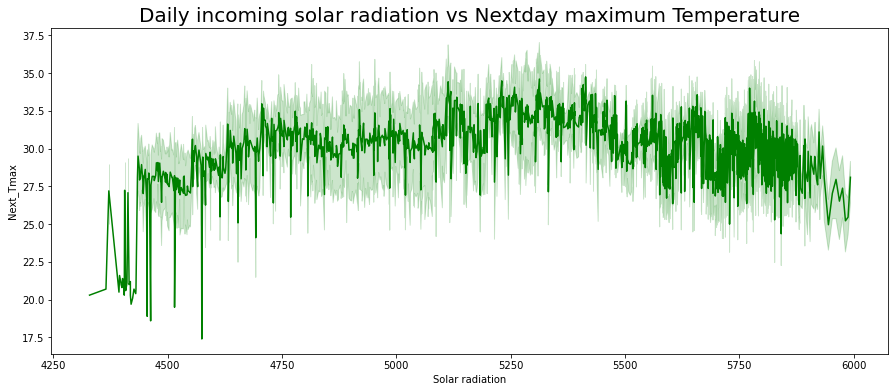

In [14]:
# comparing between Daily incoming solar radiation VS Next day maximum Temperature
plt.figure(figsize=(15,6))
plt.title('Daily incoming solar radiation vs Nextday maximum Temperature', fontsize = 20)
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df, color = "g")
plt.show()

* Here we can see that the next day maximum temperature is frequently increases.

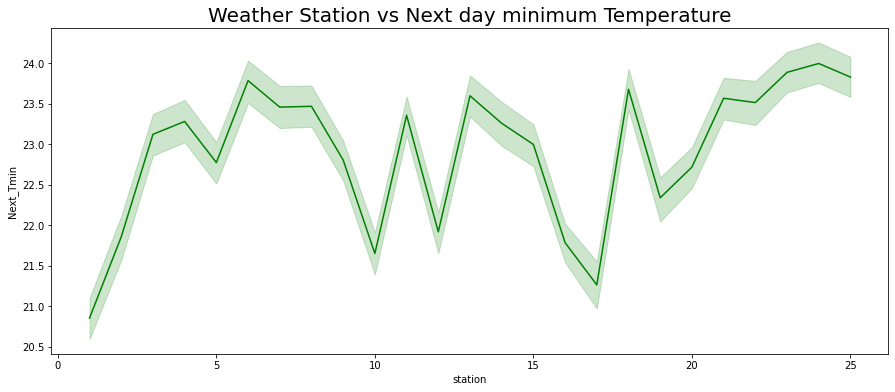

In [15]:
# comparing between weather station vs next day minimum Temperature
plt.figure(figsize=(15,6))
plt.title('Weather Station vs Next day minimum Temperature', fontsize = 20)
sns.lineplot(x='station',y='Next_Tmin',data=df, color ="g" )
plt.show()

* Here, we can see that,the line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

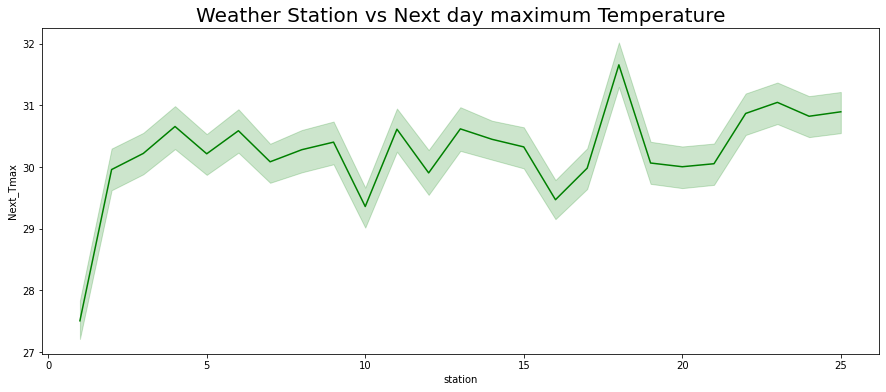

In [16]:
# comparing between weather station and next day maximum temperature
plt.figure(figsize=(15,6))
plt.title('Weather Station vs Next day maximum Temperature', fontsize = 20)
sns.lineplot(x='station',y='Next_Tmax',data=df, color ="g")
plt.show()

* Here, we can see that,the line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

Text(0, 0.5, 'Next_Tmax')

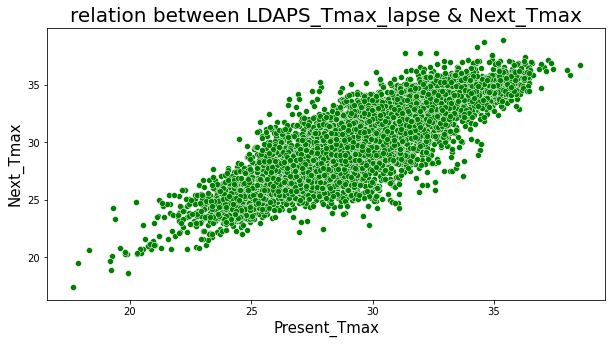

In [17]:
# relation between LDAPS_Tmax_lapse & Next_Tmax
plt.figure(figsize=(10,5))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'], color = "g")
plt.title('relation between LDAPS_Tmax_lapse & Next_Tmax', fontsize = 20)
plt.xlabel('Present_Tmax', fontsize = 15)
plt.ylabel('Next_Tmax', fontsize = 15)

* As we can see that with LDAPS_Tmax lapse temperature is also getting higher like in linear format pattern.

Text(0, 0.5, 'Next_Tmin')

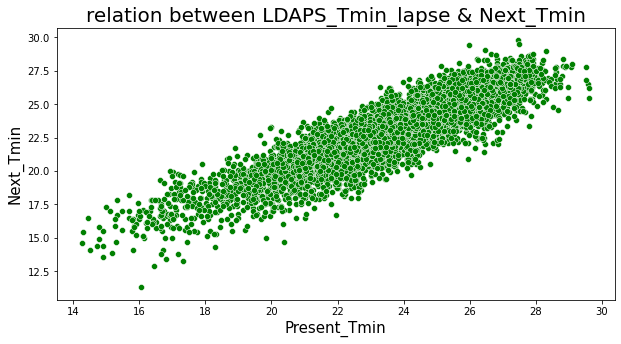

In [18]:
# relation between LDAPS_Tmin_lapse & Next_Tmin
plt.figure(figsize=(10,5))
sns.scatterplot(df['LDAPS_Tmin_lapse'], df['Next_Tmin'], color = "g")
plt.title('relation between LDAPS_Tmin_lapse & Next_Tmin', fontsize = 20)
plt.xlabel('Present_Tmin', fontsize = 15)
plt.ylabel('Next_Tmin', fontsize = 15)

* we can see here with LDAPS_Tmin_lapse temp is also getting lower.

Text(0, 0.5, 'Next_Tmin')

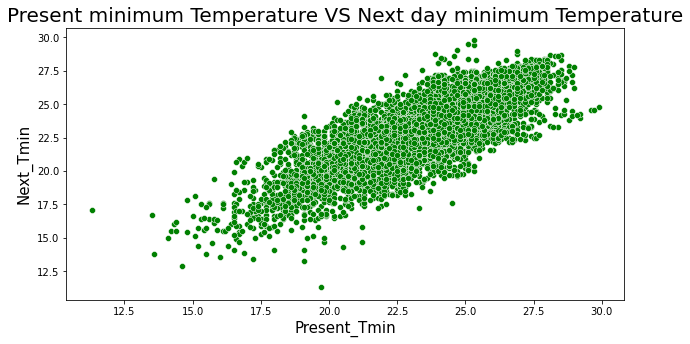

In [19]:
#Distribution data between Present minimun Temperature  vs Next day minimum Temperature.
plt.figure(figsize=(10,5))
plt.title('Present minimum Temperature VS Next day minimum Temperature',fontsize = 20)
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'], color = "g")
plt.xlabel('Present_Tmin', fontsize = 15)
plt.ylabel('Next_Tmin', fontsize = 15)

* here we can notice that when present _tmin is decreasing ,next_tmin also getting lower.

Text(0, 0.5, 'Next_Tmax')

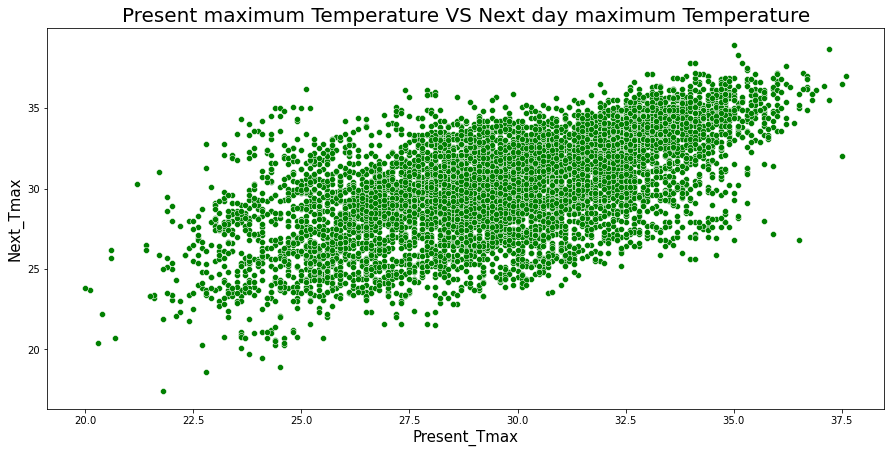

In [20]:
#Distribution data between Present maximum temperaturevs Next day maximum Temperature
plt.figure(figsize=(15,7))
plt.title('Present maximum Temperature VS Next day maximum Temperature',fontsize = 20)
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'], color = "g")
plt.xlabel('Present_Tmax',fontsize = 15)
plt.ylabel('Next_Tmax',fontsize = 15)

* Here we can see that when present_tmax is increasing,next_tax is also is getting higher and it looks like linear pattern.

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

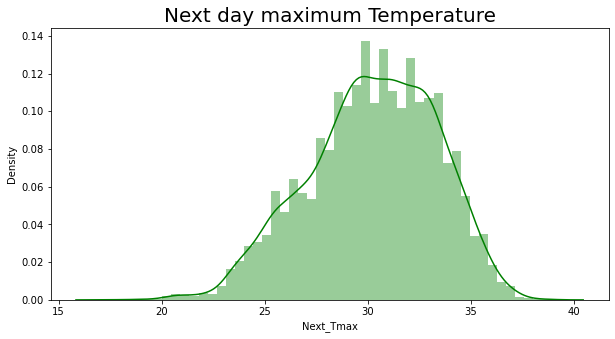

In [21]:
plt.figure(figsize=(10,5))
plt.title('Next day maximum Temperature',fontsize = 20)
sns.distplot(df['Next_Tmax'],kde=True, color = "g")

* The distribution plot clears that next day maximum temperature distribution is lies between 22 to 37.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

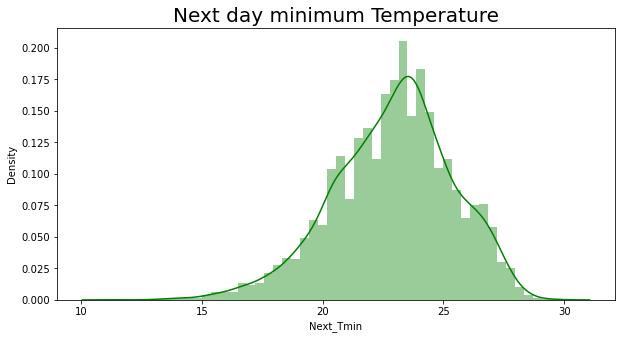

In [22]:
plt.figure(figsize=(10,5))
plt.title('Next day minimum Temperature',fontsize = 20)
sns.distplot(df['Next_Tmin'],kde=True, color = "g")

* In these plot we can see that distplot clears that next day minimum temperature distribution is lies bewteen 15 to 28.

In [23]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [24]:
 df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   int64  
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


## Checking for Outliers:

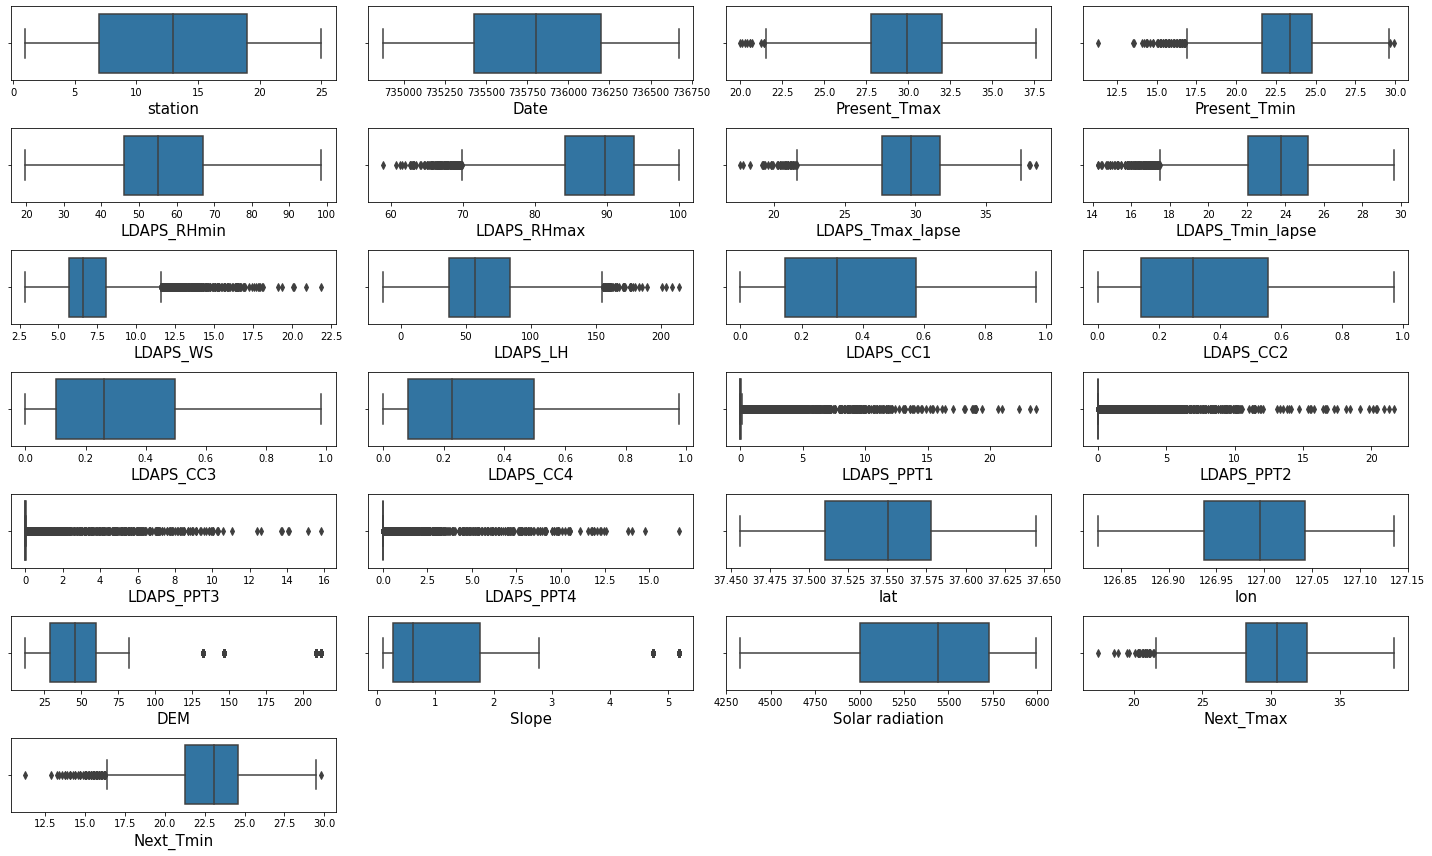

In [33]:
# Identifying the outliers using boxplot for numerical columns:

col = df.columns
plt.figure(figsize=(20,12),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=25:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* As we can see that,Only some of columns seems having outliers after skewness removed.

## Removing outliers:

### ZScore:

In [35]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [36]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (7588, 25)
After removing outliers:: (6739, 25)


In [37]:
# checking the data loss
data_loss = (7588-6739)/7588*100
print(f"""data_loss : {data_loss} %""")

data_loss : 11.188719030047443 %


* Here We are losing only 11% of data by removing outliers using zscore. Then lets remove the outliers and check data loss % by using IQR method.

### IQR:

In [38]:
from scipy import stats
IQR = stats.iqr(df)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2095, 25)


In [39]:
# checking the data loss
data_loss = (7588-2095)/7588*100
print(f"""data_loss : {data_loss} %""")

data_loss : 72.39061676331049 %


* We can observe here that using IQR method we are losing 72% of data which is huge. so considering zscore method for better result.

### choosing Zscore because there is huge dataloss in IQR:

In [40]:
df=df_1

In [41]:
df.shape

(6739, 25)

## Checking for Skewness:

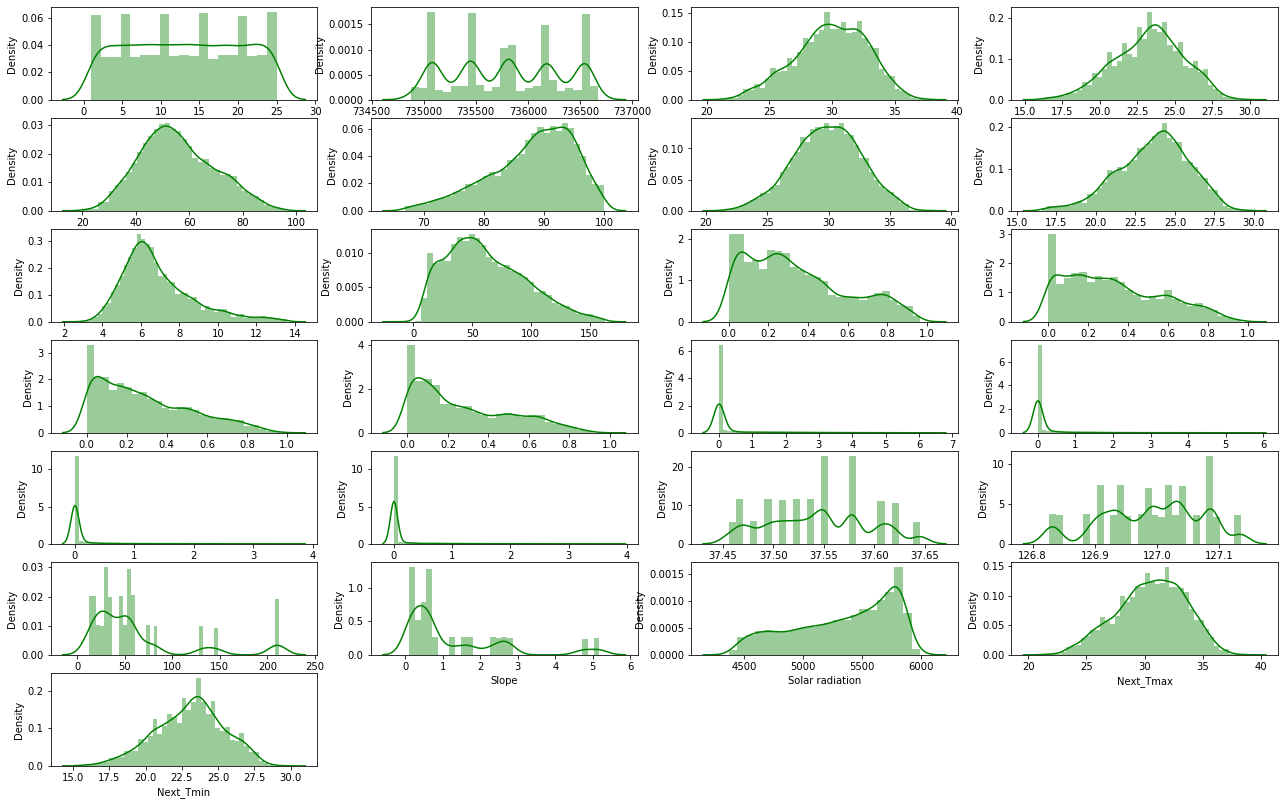

In [50]:
plt.figure(figsize=(22,16))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [43]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

* skewness more than +/-0.5 will we treated.

## removing skewness:

In [51]:
# removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [52]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

* we can see here skewness is removed, This best result we got cant handle can't treat more.

### separating both variables into different part:

In [53]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

## Scaling X values:

In [54]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [55]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

* data have been scalled.

# Model Building:
## For Next_Tmax: 

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Checking the Best Random State for Data Split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score*100,"%"," on Random_state ",maxRS)

Best accuracy is 78.83171122562874 %  on Random_state  470


In [62]:
# splitting data 70% for train and 25% for test
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.25,random_state=maxRS)

In [63]:
# importing all the required libraries to find best Algorith
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [66]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    
    print('\n accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    
    print("R2 Score                :", r2_score(y1_test,pred)*100,"%.")
    print("Mean Absolute Error     :", mean_absolute_error(y1_test,pred))
    print("Mean Squared error      :", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y1_test,pred)))
    
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean()*100,"%.")
    print("Difference between R2 score and cross validatio score is :  ",(r2_score(y1_test,pred)*100)-abs(score.mean()*100))
    print("\n *******************************************************************************")


 accuracy score of : LinearRegression()
R2 Score                : 78.83171122562874 %.
Mean Absolute Error     : 1.0609191554004807
Mean Squared error      : 1.951310349448149
Root Mean Squared Error : 1.3968931059491092
[0.61048465 0.73342953 0.64933075 0.68200722 0.68627828 0.69875056
 0.78672242 0.56762198]
cross validation score:   67.68281717211683 %.
Difference between R2 score and cross validatio score is :   11.14889405351191

 *******************************************************************************

 accuracy score of : RandomForestRegressor()
R2 Score                : 90.74388452086826 %.
Mean Absolute Error     : 0.6970041543026706
Mean Squared error      : 0.8532363727002971
Root Mean Squared Error : 0.9237079477303944
[0.6518155  0.72940967 0.60665313 0.60614541 0.69499698 0.67148801
 0.75237367 0.57518   ]
cross validation score:   66.10077958015019 %.
Difference between R2 score and cross validatio score is :   24.643104940718075

 *******************************

After analysing above scores, we can see that,
* Our Random Forest Regressor giving the maximum accuracy score. but, 
* The difference between accuracy score and cross validation score of Ridge Regressor is very less compared to other models.
* So we can conclude that **'Ridge' is our best fitting model.**

## Hyper Parameter Tuning with Ridge for Next_Tmax:

In [67]:
# import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(),parameters, cv=5)
clf.fit(x_train,y1_train)
clf.best_params_  #Best parameters

{'max_iter': 10, 'random_state': 15, 'solver': 'saga'}

In [68]:
clf_pred=clf.best_estimator_.predict(x_test)

In [70]:
print("r2_score: ",r2_score(y1_test, clf_pred)*100,"%")

r2_score:  78.80434289971456 %


* **Our model learnt almost 78.80% for Next_Tmax.**

## Saving the model:

In [71]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([28.70463229, 31.47326312, 31.05698293, ..., 34.01086214,
       29.22781353, 28.11744823])

In [72]:
pd.set_option("display.max_rows",None,"display.max_columns",None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

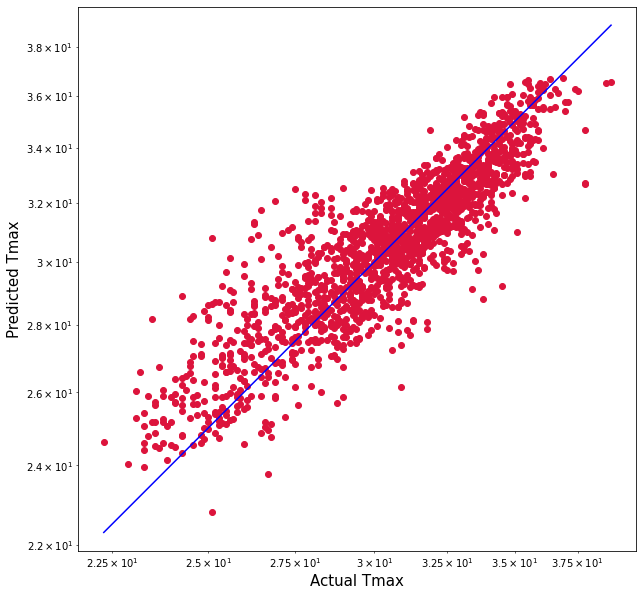

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y1_test))
p2 = min(min(Predicted), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmax',fontsize=15)
plt.ylabel('Predicted Tmax', fontsize=15)
plt.axis('equal')
plt.show()

## For Next_Tmax:

### Checking the Best Random State for Data Split:

In [74]:
maxR2_Score=0
maxRS=0

for i in range(0,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8399390882969533  on Random_state  152


In [75]:
# splitting data 75% train and 25% for test
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [80]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    
    print('\n accuracy score of :', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    
    print("\nR2 Score                :", r2_score(y2_test,pred)*100,"%.")
    print("Mean Absolute Error     :", mean_absolute_error(y2_test,pred))
    print("Mean Squared error      :", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y2_test,pred)))
    
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean()*100,"%.")
    print("\nDifference between R2 score and cross validatio score is :  ",(r2_score(y2_test,pred)*100)-abs(score.mean()*100))
    print("\n *******************************************************************************")


 accuracy score of : LinearRegression()

R2 Score                : 83.99390882969533 %.
Mean Absolute Error     : 0.7604827887049153
Mean Squared error      : 0.9141947327846559
Root Mean Squared Error : 0.9561353109182068
[0.61836676 0.80606344 0.65668161 0.78965708 0.80528942 0.8092919
 0.83715727 0.84370258]
cross validation score:   77.07762561733699 %.

Difference between R2 score and cross validatio score is :   6.916283212358337

 *******************************************************************************

 accuracy score of : RandomForestRegressor()

R2 Score                : 90.97483239479358 %.
Mean Absolute Error     : 0.5523697329376859
Mean Squared error      : 0.5154763020771521
Root Mean Squared Error : 0.7179667834079457
[0.57044438 0.81861229 0.68377258 0.79677283 0.8014685  0.83078781
 0.85030266 0.86392458]
cross validation score:   77.70107056337491 %.

Difference between R2 score and cross validatio score is :   13.273761831418668

 ***************************

After analysing above scores, we can see that,
* Our Random Forest Regressor giving the maximum accuracy score. but, 
* The difference between accuracy score and cross validation score of Ridge Regressor is very less compared to other models.
* So we can conclude that **'Ridge' is our best fitting model.**

## Hyper Parameter Tuning with Ridge for Next_Tmin:

In [82]:
# import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(),parameters, cv=5)
clf.fit(x_train,y2_train)
clf.best_params_  #Best parameters

{'max_iter': 20, 'random_state': 17, 'solver': 'saga'}

In [83]:
clf_pred=clf.best_estimator_.predict(x_test)

In [84]:
print("r2_score: ",r2_score(y2_test, clf_pred)*100,"%")

r2_score:  83.96366583465031 %


* **our model learnt almost 83.96% for Next_Tmin.**

## Saving Model:

In [90]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([24.29615579, 23.41863828, 22.4639092 , ..., 26.41367691,
       25.471905  , 24.58909882])

In [91]:
pd.set_option("display.max_rows",None,"display.max_columns",None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

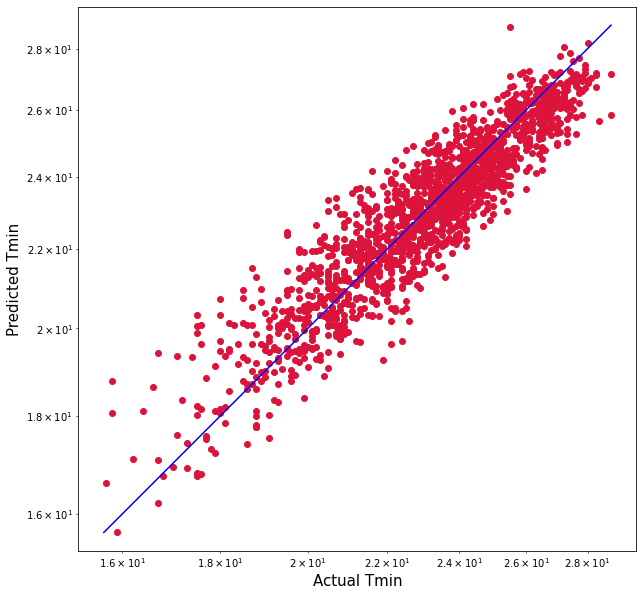

In [92]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y2_test))
p2 = min(min(Predicted), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Tmin',fontsize=15)
plt.ylabel('Predicted Tmin', fontsize=15)
plt.axis('equal')
plt.show()

# Conclusion:

* Present_Tmax and Present_Tmin are highly correlated with Target variables.
* LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables.
* Next_Tmin and Next_Tmax are also highly correlated with exch other.
* And most of the columns are negatively correlated with target variables.


For both the target variable:
* Our Random Forest Regressor giving the maximum accuracy score. but, 
* The difference between accuracy score and cross validation score of Ridge Regressor is very less compared to other models.
* So we can conclude that **'Ridge' is our best fitting model.**


* **Final model r2 score for predicting Next_Tmax = 78.8%.**
* **Final model r2 score for predicting Next_Tmin = 83.96%.**